In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Default of Credit Card Clients Dataset**
### Default Payments of Credit Card Clients in Taiwan from 2005

**Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

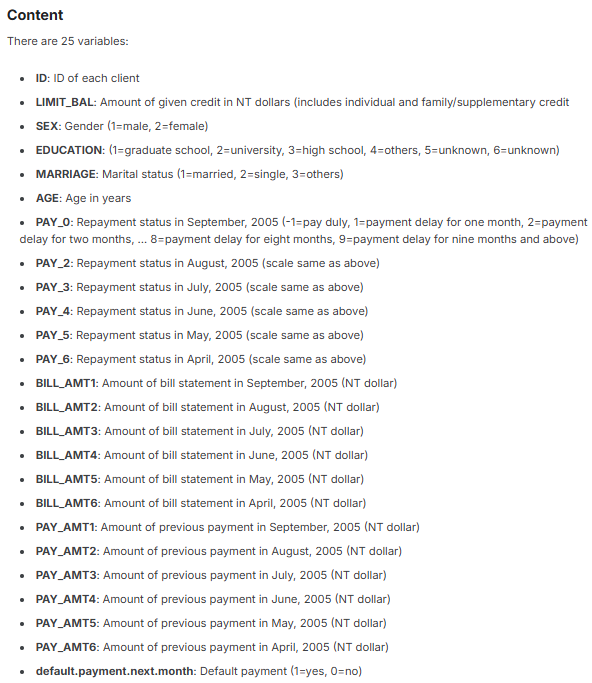

Data source: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data

# **1. CREDIT RISK DATA ANALYSIS**

## **Importing modules and libraries**

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [42]:
credit_risk_dataset = pd.read_csv("/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")

In [43]:
credit_risk_dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [44]:
df = credit_risk_dataset.copy()
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1


In [45]:
df.drop(["ID"], axis=1, inplace=True)

In [46]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [47]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# **Cleaning and deleting missing values in the dataset**

In [49]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [50]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [51]:
df['EDUCATION'].replace({0:1, 1:1, 2:2, 3:3, 4:4, 5:1, 6:1}, inplace=True)
df['EDUCATION'].value_counts()

<ipython-input-51-957bdb0414b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EDUCATION'].replace({0:1, 1:1, 2:2, 3:3, 4:4, 5:1, 6:1}, inplace=True)


EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

In [52]:
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

<ipython-input-52-8ef7c1d996e4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)


MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

#  **Visualization and plots**

**Y Distribution - Target**

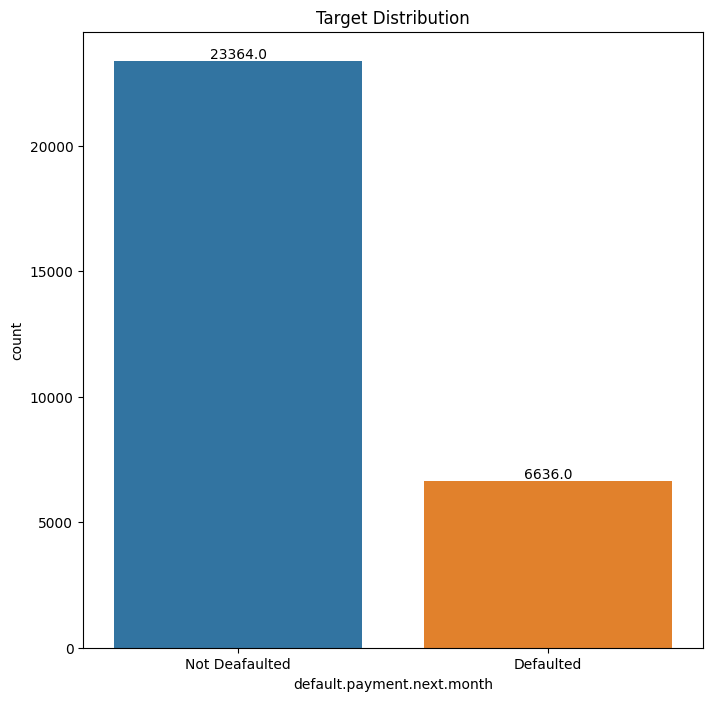

In [93]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df['default.payment.next.month'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")
plt.show()

**Age Distribution Plot**

<ipython-input-57-a81846fce597>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'], kde=True, color='green')
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count of Clients')

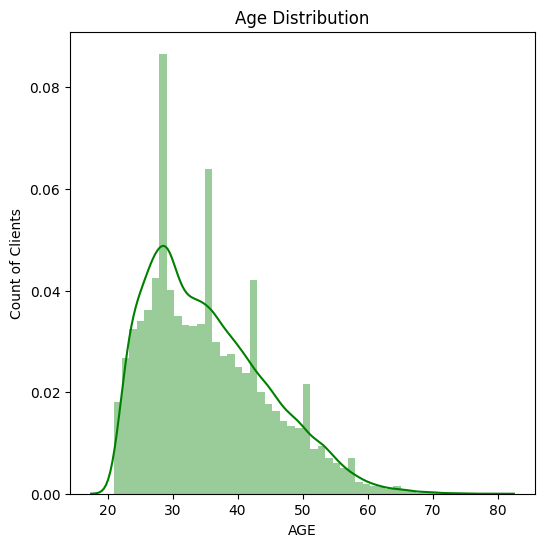

In [57]:
plt.figure(figsize=(6,6))
sns.distplot(df['AGE'], kde=True, color='green')

plt.title('Age Distribution')
plt.ylabel('Count of Clients')

**Gender Distribution Plot in Seaborn**

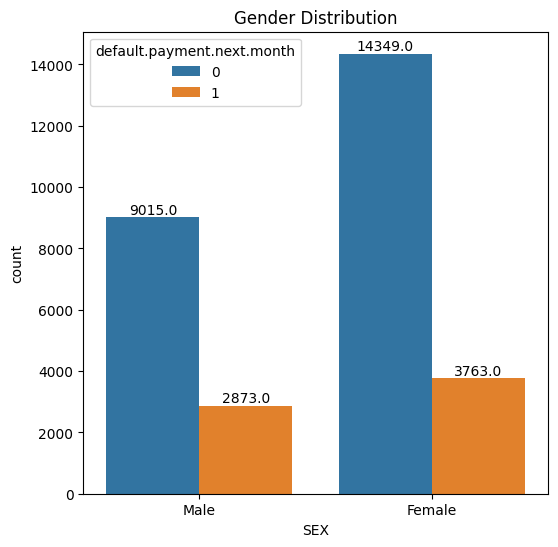

In [67]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='SEX',hue='default.payment.next.month',data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Gender Distribution")
plt.show()

**Education Distribution Plot**

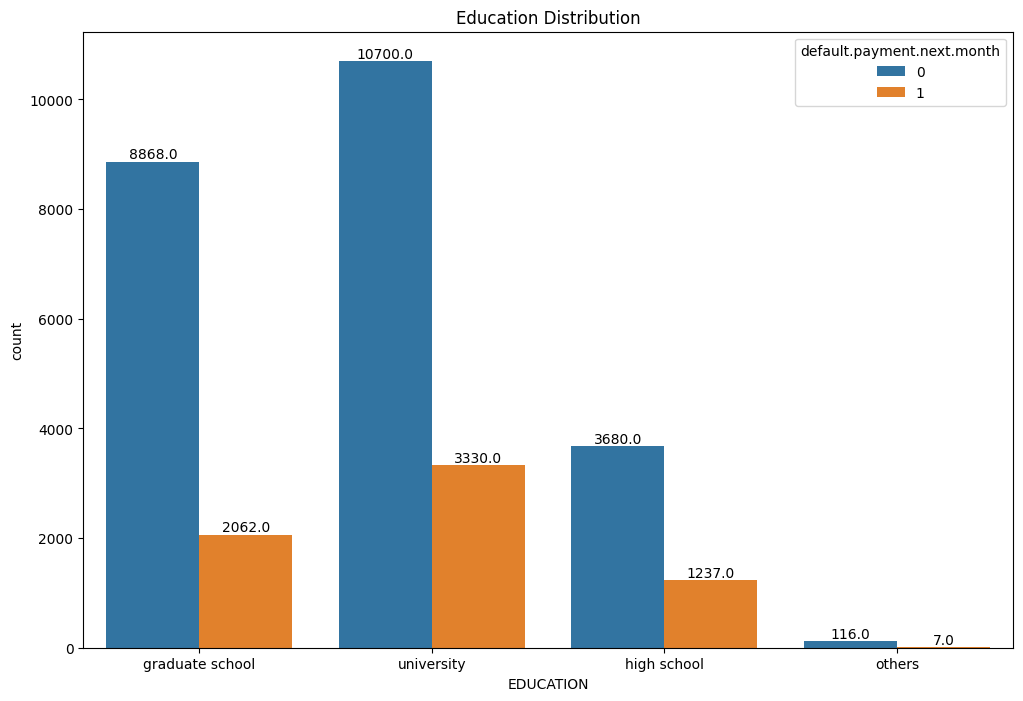

In [60]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xticks([0,1,2,3], labels=['graduate school', 'university', 'high school', 'others'])
plt.title('Education Distribution')
plt.show()

**Marriage Distribution Plot**

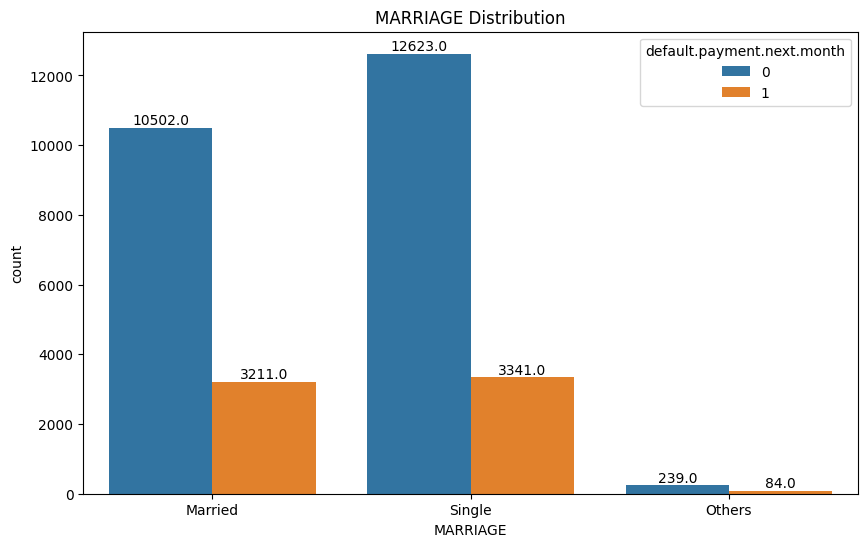

In [73]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df)

for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks([0,1,2], labels=['Married', "Single", "Others"])
plt.title("MARRIAGE Distribution")
plt.show()

**Plots with column LIMIT_BALL**

<ipython-input-78-2e6a3cebc068>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.LIMIT_BAL, kde=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='LIMIT_BAL', ylabel='Density'>

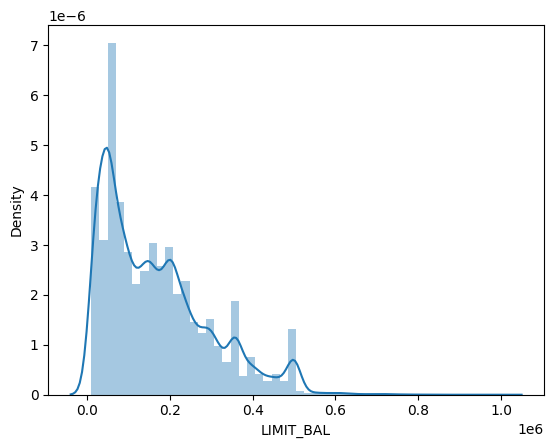

In [78]:
sns.distplot(df.LIMIT_BAL, kde=True)

<ipython-input-79-31f6378ae738>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


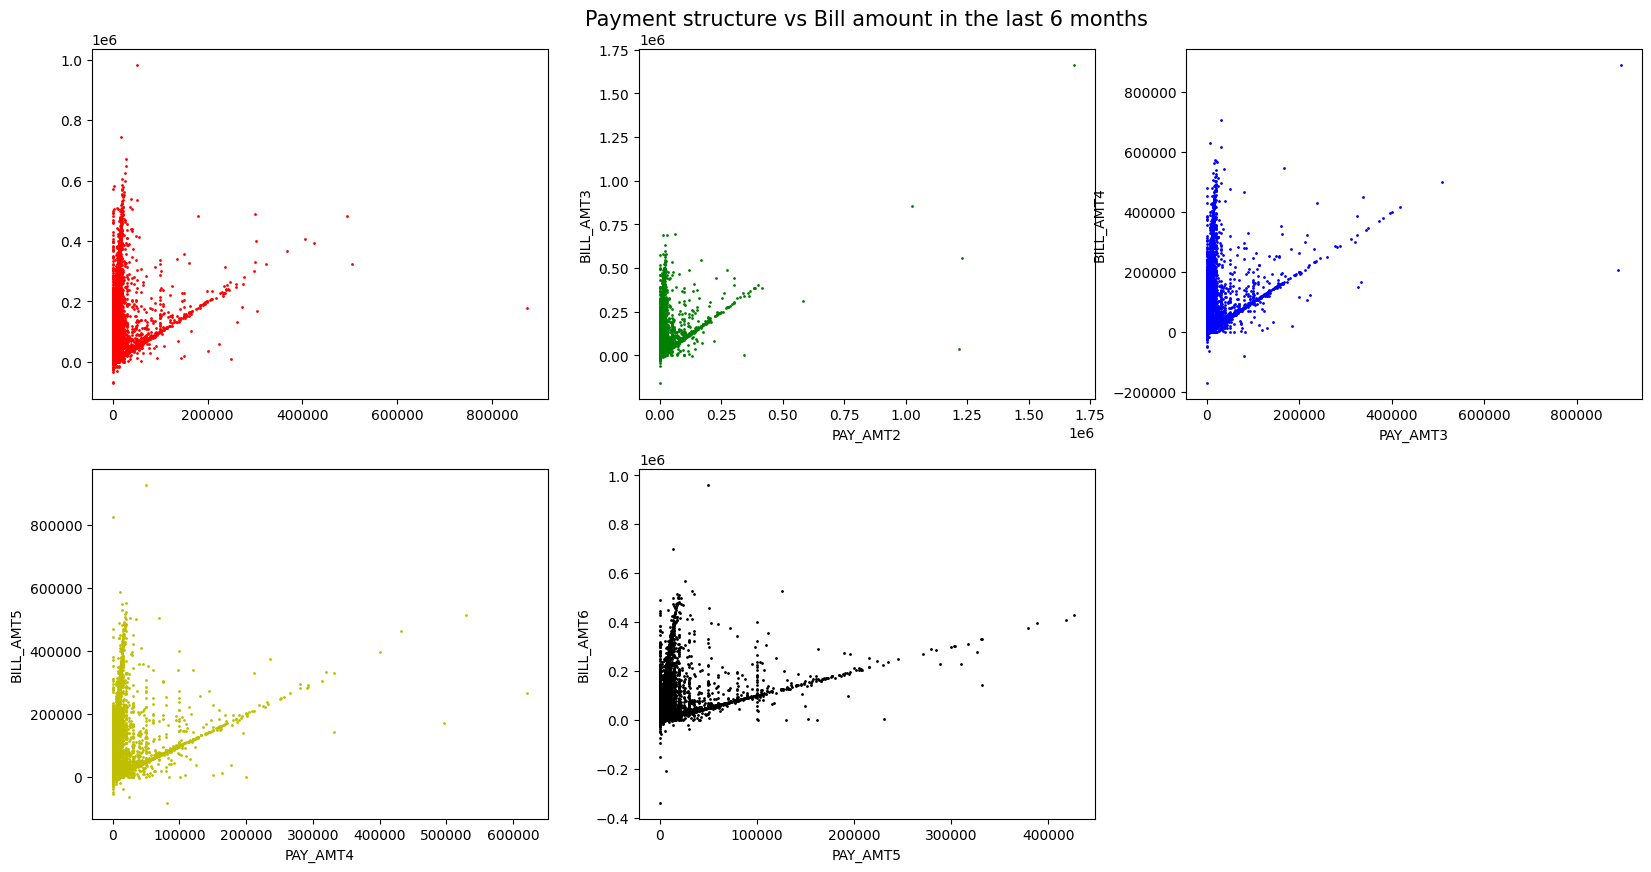

In [79]:
plt.subplots(figsize=(20, 10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT2, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT3, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT3')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT4, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT4')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT5')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT6, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT6')
plt.show()

**Independent variables Xi**

In [83]:
x = df.drop(['default.payment.next.month'], axis=1)

**Dependent variable Y**

In [84]:
y = df['default.payment.next.month']

**Importing modules and libraries to create model**

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

scaler = StandardScaler()
X = scaler.fit_transform(x)

**Divide dataset into train and test sets**

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Number of instances before SMOTE**

In [102]:
print(Counter(y_train))

Counter({0: 18677, 1: 5323})


In [103]:
SMOTE = SMOTE()
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

**Number of instances after SMOTE**

In [104]:
print(Counter(y_train))

Counter({0: 18677, 1: 18677})


# **2. CREDIT RISK DATA MODELING**

In [112]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

prediction_logistic_regression = logistic_regression.predict(X_test)

In [115]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [123]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


**The Accuracy of Logistic Regression Model**

In [128]:
print("The accuracy of logistic regression model is: ", accuracy_score(y_test, prediction_logistic_regression))

The accuracy of logistic regression model is:  0.6801666666666667


In [129]:
classification_report(y_test, prediction_logistic_regression)

'              precision    recall  f1-score   support\n\n           0       0.88      0.68      0.77      4687\n           1       0.37      0.67      0.48      1313\n\n    accuracy                           0.68      6000\n   macro avg       0.63      0.68      0.62      6000\nweighted avg       0.77      0.68      0.71      6000\n'

In [135]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay

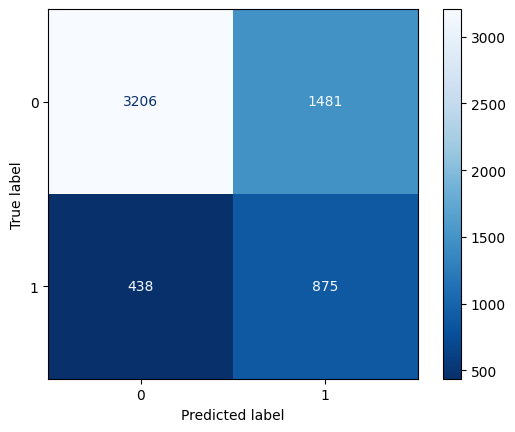

In [137]:
ConfusionMatrixDisplay.from_estimator(logistic_regression, X_test, y_test, cmap="Blues_r")

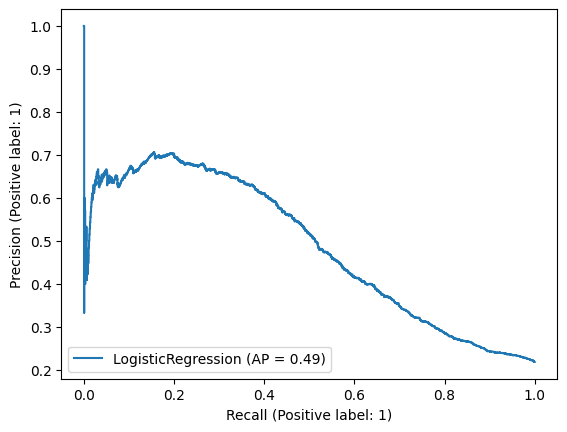

In [138]:
PrecisionRecallDisplay.from_estimator(logistic_regression, X_test, y_test)

In [139]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [140]:
print("The accuracy:", accuracy_score(y_test, pred_rf))

The accuracy: 0.7945


In [141]:
classification_report(y_test, pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87      4687\n           1       0.53      0.47      0.50      1313\n\n    accuracy                           0.79      6000\n   macro avg       0.70      0.68      0.69      6000\nweighted avg       0.79      0.79      0.79      6000\n'

The accuracy of XGB Classifier model is: 0.8006666666666666
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.56      0.41      0.48      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.66      0.68      6000
weighted avg       0.78      0.80      0.79      6000



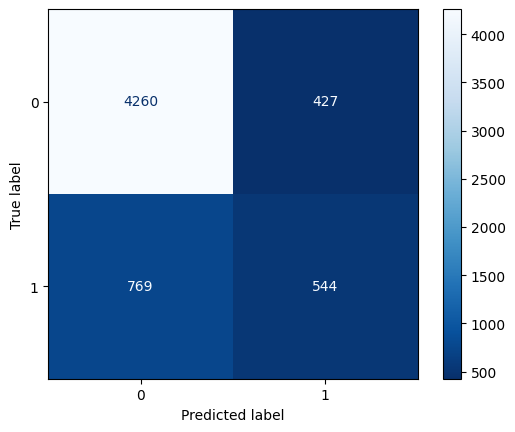

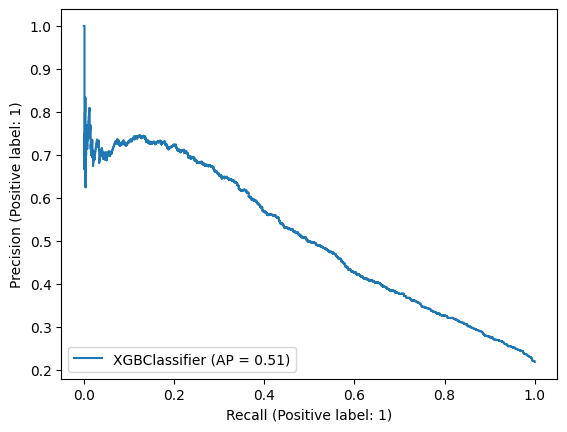

In [147]:
import xgboost as xgb

xgb_clf_obj = xgb.XGBClassifier()

#fitting the model
xgb_clf_obj.fit(X_train,y_train)

## Predicting the model
xgb_predict= xgb_clf_obj.predict(X_test)
print("The accuracy of XGB Classifier model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

# Plot confusion metrics
ConfusionMatrixDisplay.from_estimator(xgb_clf_obj, X_test, y_test, cmap="Blues_r")

plt.show()

# plot pprcision_recall curve
PrecisionRecallDisplay.from_estimator(xgb_clf_obj,X_test,y_test)